# Hitting Time Distributions

In [116]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as npr
import scipy.stats as ss
import seaborn as sns
import household_contact_tracing_dropbox as model
import warnings
from progressbar import ProgressBar
pbar = ProgressBar()
warnings.filterwarnings('ignore')
sns.set()
%matplotlib inline

- |#                                                  | 0 Elapsed Time: 0:00:00


## Contacts under surveillance

We condition on the event that the epidemic does not go extinct. The number of contacts that can be under surveillance is either 800 or 8000.

This is most relevent early in the outbreak, and we assume no social distancing

In [69]:
simulation = model.household_sim_contact_tracing(proportion_of_within_house_contacts = 0.3372348,
                                                haz_rate_scale = 0.805,
                                                contact_tracing_success_prob = 2/3,
                                                prob_of_successful_contact_trace_today = 1/2,
                                                overdispersion = 0.36,
                                                infection_reporting_prob = 0.8,
                                                reporting_delay_par = 1/2,
                                                contact_trace = True,
                                                reduce_contacts_by = 0.0) # 0.1 means a person makes 10% less contacts

In [60]:
%%time

observations_required = 5000

simulations_performed = 0

# Counting the number of times each capacity was hit
times_hit_800 = 0
times_hit_8000 = 0
timed_out_count = 0

# Empty lists to store the hitting times in
hitting_times_800 = []
hitting_times_8000 = []

# We condition on the event that we see the 8000 capacity hit
while times_hit_8000 != observations_required:
    
    simulations_performed += 1
    
    simulation.run_simulation_hitting_times(time_out = 150)
    
    if simulation.hit_800 == True:
        times_hit_800 += 1
        
    if simulation.hit_8000 == True:
        times_hit_8000 += 1
        
        # We condition on the event the simulation reached 8000 capacity
        hitting_times_800.append(simulation.time_800)
        hitting_times_8000.append(simulation.time_8000)
        
    if simulation.timed_out == True:
        timed_out_count += 1
        
    print(f"Simulations performed: {simulations_performed}, progress: {times_hit_8000}/{observations_required}, time outs: {timed_out_count}", end = "\r")

Wall time: 34min 39sd: 6573, progress: 5000/5000, time outs: 178


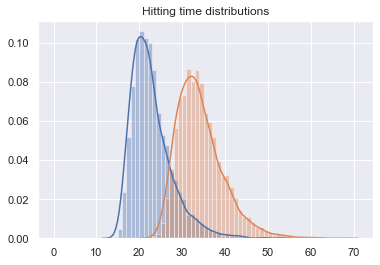

In [110]:
plot_800 = sns.distplot(hitting_times_800,
                        #fit = ss.gumbel_r,
                        bins = range(70),
                        kde = True
                       )
plot_8000 = sns.distplot(hitting_times_8000,
                         #fit = ss.gumbel_r,
                         bins = range(70),
                         kde = True
                        )
plt.title("Hitting time distributions")
plt.savefig("HittingTimes.png")

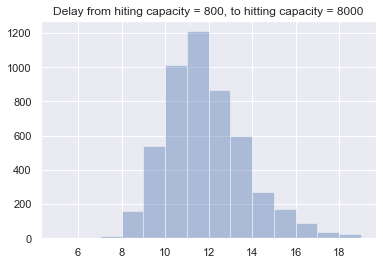

In [114]:
sns.distplot(np.array(hitting_times_8000) - np.array(hitting_times_800), kde = False, hist = True, bins = range(5,20))
plt.title("Delay from hiting capacity = 800, to hitting capacity = 8000")
plt.savefig("Hitting Time Delays.png")

In [63]:
prob_hitting_800 = times_hit_800/simulations_performed*100
prob_hitting_800

76.06876616461281

In [64]:
prob_hitting_8000 = times_hit_8000/simulations_performed*100
prob_hitting_8000

76.06876616461281

In [65]:
timed_out_count

178